# Optimizing Completion of the IE/CS/Math Degree at UW-Madison
#### By Tyner Nies and Julia Forlini

## Introduction 
At UW-Madison, it is very common for students to declare multiple majors as there is a lot of course intersection between subjects. For example, Computer Science, Industrial Engineering, and Math have a lot of intersecting required coursework and within that coursework there are several possible paths to gain enough credits to graduate and complete the major. We will find the most optimal path to complete the required credits for all three of these majors, while minimizing the number of classes taken. We will also optimize scheduling if a student wanted to go abroad the second semester of their junior year.

## Approach 
We used the shortest path method to find the minimum number of classes taken while still meeting credit and class requirements. Additionally, we used the critical path method to ensure the correct prerequisites were taken if a course was chosen. All of the data below is scraped directly from the UW course catalog for getting class data and the UW major requirements website for getting major requirement data. The data was scraped using the python requests module to grab the class data for all classes at UW Madison and filtered to only include the classes that were relevant to our scope which can be found in the scraper.ipynb notebook (took about 10 minutes to run). The data regarding the major requirement data posed hard to collect programmactically so for our purposes, we gathered it ourselves by looking at all 3 respective majors websites and collecting it ourselves. Additionally, we wanted to include a model for a student going abroad in there second semster Junior year, which is common. For this option, we wanted to figure out the optimal upper bound of credits a student could take during that semester, as most students want a less academically challenging semester when they are overseas. To tackle this, we tested multiple values for this upper bound and chose the one with the lowest output for optimal credits of that semester. 

In [2]:
import pandas as pd 
df = pd.read_csv('allcourses.csv')

ie_classes = ['I SY E 348', 'I SY E 605', 'I SY E 612', 'MATH/STAT  309', 'COMP SCI 320', 'I SY E 315', 'STAT 311', 'I SY E 210', 'CHEM 103', 'I SY E/PSYCH  653', 'I SY E/M E  510', 'LSC 100', 'I SY E 312', 'I SY E/B M E  564', 'MATH 234', 'MATH/STAT  310', 'CHEM 344', 'I SY E 412', 'I SY E/COMP SCI  526', 'I SY E 649', 'I SY E/M E  641', 'I SY E/B M I  617', 'I SY E/N E  574', 'I SY E/PHARMACY  608', 'I SY E/CIV ENGR/N E  460', 'ENGL 100', 'I SY E 516', 'STAT 312', 'MATH 222', 'BIOLOGY/BOTANY/ZOOLOGY  151', 'I SY E 515', 'CHEM 343', 'I SY E 575', 'I SY E 417', 'I SY E/B M E  662', 'PHYSICS 248', 'BIOLOGY/BOTANY/ZOOLOGY  152', 'CHEM 109', 'I SY E/COMP SCI/M E  558', 'I SY E 313', 'CHEM 311', 'MICROBIO 101', 'CHEM 346', 'I SY E 415', 'MATH 340', 'ECON 101', 'MATH 421', 'I SY E 604', 'MATH 319', 'CHEM 104', 'COMP SCI 200', 'I SY E 645', 'COMP SCI 300', 'E M A 202', 'I SY E 602', 'I SY E/M E  512', 'I SY E 350', 'CHEM 327', 'I SY E 620', 'I SY E/PSYCH  549', 'MATH 221', 'PHYSICS 201', 'I SY E/PSYCH  349', 'I SY E 557', 'CHEM 345', 'MATH 441', 'CHEM 341', 'I SY E 191', 'I SY E 320', 'COMP SCI 412', 'ANAT&PHY 335', 'I SY E 321', 'I SY E 323', 'PHYSICS 249', 'I SY E 520', 'I SY E 517', 'PHYSICS 208', 'CHEM 329', 'PHYSICS 241', 'MICROBIO 102', 'MATH 522', 'I SY E/COMP SCI/E C E  524', 'COM ARTS 100', 'I SY E/M E  643', 'I SY E 521', 'I SY E 555', 'PHYSICS 207', 'I SY E 603', 'I SY E 606', 'COMP SCI 220', 'I SY E/COMP SCI/MATH  425', 'ZOOLOGY 153', 'PHYSICS 202', 'I SY E 552', 'I SY E/COMP SCI/DS  518', 'MATH 443', 'CHEM 115', 'CHEM 342', 'I SY E 624', 'I SY E 615', 'I SY E 450', 'STAT/COMP SCI/MATH  475', 'MATH 521', 'E M A 201', 'CHEM 116', 'COMP SCI 400', 'I SY E 562', 'I SY E/MATH/OTM/STAT  632', 'ESL 118', 'INTEREGR 397', 'MATH/COMP SCI  240', 'PHYSICS 205', 'I SY E/COMP SCI/MATH/STAT  525', 'I SY E/M E  512']

math_classes = ['MATH/B M I/BIOCHEM/BMOLCHEM  609', 'MATH 114', 'MATH/COMP SCI/E C E  435', 'MATH 567', 'MATH 682', 'MATH/PHILOS  571', 'MATH/STAT  309', 'MATH 629', 'MATH 321', 'MATH 698', 'MATH/COMP SCI/I SY E  425', 'MATH 623', 'MATH 627', 'MATH 375', 'MATH 699', 'MATH/E C E  641', 'MATH 540', 'MATH 621', 'MATH 542', 'MATH 561', 'MATH 607', 'MATH 320', 'MATH/I SY E/OTM/STAT  632', 'MATH 341', 'MATH 531', 'MATH/COMP SCI  513', 'MATH 605', 'MATH 692', 'MATH 441', 'MATH 443', 'MATH 490', 'MATH/STAT  310', 'MATH/COMP SCI/I SY E/STAT  525', 'MATH 551', 'MATH 376', 'STAT/COMP SCI/MATH  475', 'MATH/STAT  431', 'MATH 467', 'MATH/HIST SCI  473', 'MATH 570', 'MATH 415', 'MATH 521', 'MATH 635', 'MATH 331', 'MATH 535', 'MATH 491', 'MATH 421', 'MATH 340', 'MATH 322', 'MATH 461', 'MATH 541', 'MATH 691', 'MATH 407', 'MATH 519', 'MATH 390', 'MATH 552', 'MATH 619', 'MATH 681', 'MATH/COMP SCI  514', 'MATH 319', 'MATH 522']

cs_classes = ['MATH 275', 'MATH 171', 'MATH 321', 'STAT 311', 'STAT 324', 'MATH 375', 'COMP SCI/I SY E/MATH/STAT  525', 'E C E 331', 'MATH 542', 'MATH 320', 'MATH 217', 'COMP SCI/E C E  561', 'COMP SCI 520', 'MATH 234', 'COMP SCI/I SY E  635', 'STAT/MATH  309', 'COMP SCI 577', 'COMP SCI 559', 'COMP SCI/B M I  576', 'MATH 331', 'COMP SCI/I SY E  526', 'COMP SCI/MATH  240', 'MATH/PHILOS  571', 'STAT 312', 'MATH 222', 'COMP SCI/E C E  252', 'COMP SCI/I SY E/MATH  425', 'COMP SCI/E C E/M E  539', 'COMP SCI 570', 'COMP SCI/E C E  354', 'COMP SCI 536', 'COMP SCI/STAT  471', 'MATH 340', 'MATH 461', 'COMP SCI/I SY E/M E  558', 'COMP SCI/E C E/MATH  435', 'COMP SCI 564', 'COMP SCI/MATH  514', 'MATH 319', 'STAT/COMP SCI/MATH  475', 'MATH 567', 'COMP SCI 544', 'COMP SCI/B M I  567', 'COMP SCI/MATH  513', 'COMP SCI 300', 'COMP SCI 538', 'COMP SCI 534', 'COMP SCI 639', 'MATH 221', 'MATH 341', 'COMP SCI 571', 'COMP SCI 642', 'COMP SCI 537', 'COMP SCI 540', 'MATH/STAT  431', 'COMP SCI 412', 'COMP SCI/E C E  552', 'COMP SCI 542', 'MATH 276', 'STAT/MATH  310', 'COMP SCI 407', 'COMP SCI/DS  579', 'COMP SCI/E C E/M E  532', 'COMP SCI 640', 'COMP SCI/DS/I SY E  518', 'COMP SCI 566', 'COMP SCI/E C E  506', 'MATH 443', 'MATH 376', 'COMP SCI/E C E  533', 'MATH 521', 'MATH 541', 'MATH 322', 'COMP SCI 400', 'COMP SCI 545']


ie_credits = df[df['Class'].isin(ie_classes)].reset_index(drop=True)[['Department', 'Class', 'Credits', 'Requisites']].set_index('Class')
ie_credits.loc['INTEREGR 397', 'Credits'] = 3

math_credits = df[df['Class'].isin(math_classes)].reset_index(drop=True)[['Department', 'Class', 'Credits', 'Requisites']].set_index('Class')

cs_credits = df[df['Class'].isin(cs_classes)].reset_index(drop=True)[['Department', 'Class', 'Credits', 'Requisites']].set_index('Class')

class_credits = pd.concat([cs_credits, ie_credits, math_credits])
class_credits.to_csv('classes_inc.csv')

In [3]:
# reading in dataframe and getting credits parameter
df = pd.read_csv('classes_inc.csv')
classes_inc = list(df['Class'])
modified_classes = [c.replace(' ', '_').replace('/', '_').lower().replace('__', '_').replace('comp_sci','cs').replace('e_c_e', 'ece').replace('m_e', 'me').replace('i_sy_e','ie').replace('&', '_')  for c in classes_inc]
df['ID'] = modified_classes
class_credits = df[['ID', 'Credits']]
pd.set_option('display.max_rows', None)

req_cred_data = pd.DataFrame(
    {
        "Requirement": [
            "ie_phys_ema", "ie_basic_science",  "ie_cs_choice", "ie_an_op_req", "ie_diff_elective", "ie_elective", "ie_comm_req",
            "math_algebra", "math_advanced", "math_electives", "math_linalg", "cs_calc_req", "cs_math", "cs_theory", "cs_software", "cs_app", "cs_elective"
        ],
        "Credits": [
            5, 6, 3, 9, 3, 6, 6, 6, 3, 9, 3, 9, 6, 3, 6, 3, 6
        ]
    }
)
requirement_credits = req_cred_data[['Requirement','Credits']]

disc_class = [('ie', 'ie_348'),
 ('ie', 'ie_605'),
 ('ie', 'ie_612'),
 ('ie', 'math_stat_309'),
 ('ie', 'cs_320'),
 ('ie', 'ie_315'),
 ('ie', 'stat_311'),
 ('ie', 'ie_210'),
 ('ie', 'chem_103'),
 ('ie', 'ie_psych_653'),
 ('ie', 'ie_me_510'),
 ('ie', 'lsc_100'),
 ('ie', 'ie_312'),
 ('ie', 'ie_b_me_564'),
 ('ie', 'math_234'),
 ('ie', 'math_stat_310'),
 ('ie', 'chem_344'),
 ('ie', 'ie_412'),
 ('ie', 'ie_cs_526'),
 ('ie', 'ie_649'),
 ('ie', 'ie_me_641'),
 ('ie', 'ie_b_m_i_617'),
 ('ie', 'ie_n_e_574'),
 ('ie', 'ie_pharmacy_608'),
 ('ie', 'ie_civ_engr_n_e_460'),
 ('ie', 'engl_100'),
 ('ie', 'ie_516'),
 ('ie', 'stat_312'),
 ('ie', 'math_222'),
 ('ie', 'biology_botany_zoology_151'),
 ('ie', 'ie_515'),
 ('ie', 'chem_343'),
 ('ie', 'ie_575'),
 ('ie', 'ie_417'),
 ('ie', 'ie_b_me_662'),
 ('ie', 'physics_248'),
 ('ie', 'biology_botany_zoology_152'),
 ('ie', 'chem_109'),
 ('ie', 'ie_cs_me_558'),
 ('ie', 'ie_313'),
 ('ie', 'chem_311'),
 ('ie', 'microbio_101'),
 ('ie', 'chem_346'),
 ('ie', 'ie_415'),
 ('ie', 'math_340'),
 ('ie', 'econ_101'),
 ('ie', 'math_421'),
 ('ie', 'ie_604'),
 ('ie', 'math_319'),
 ('ie', 'chem_104'),
 ('ie', 'cs_200'),
 ('ie', 'ie_645'),
 ('ie', 'cs_300'),
 ('ie', 'e_m_a_202'),
 ('ie', 'ie_602'),
 ('ie', 'ie_me_512'),
 ('ie', 'ie_350'),
 ('ie', 'chem_327'),
 ('ie', 'ie_620'),
 ('ie', 'ie_psych_549'),
 ('ie', 'math_221'),
 ('ie', 'physics_201'),
 ('ie', 'ie_psych_349'),
 ('ie', 'ie_557'),
 ('ie', 'chem_345'),
 ('ie', 'math_441'),
 ('ie', 'chem_341'),
 ('ie', 'ie_191'),
 ('ie', 'ie_320'),
 ('ie', 'cs_412'),
 ('ie', 'anat_phy_335'),
 ('ie', 'ie_321'),
 ('ie', 'ie_323'),
 ('ie', 'physics_249'),
 ('ie', 'ie_520'),
 ('ie', 'ie_517'),
 ('ie', 'physics_208'),
 ('ie', 'chem_329'),
 ('ie', 'physics_241'),
 ('ie', 'microbio_102'),
 ('ie', 'math_522'),
 ('ie', 'ie_cs_ece_524'),
 ('ie', 'com_arts_100'),
 ('ie', 'ie_me_643'),
 ('ie', 'ie_521'),
 ('ie', 'ie_555'),
 ('ie', 'physics_207'),
 ('ie', 'ie_603'),
 ('ie', 'ie_606'),
 ('ie', 'cs_220'),
 ('ie', 'ie_cs_math_425'),
 ('ie', 'zoology_153'),
 ('ie', 'physics_202'),
 ('ie', 'ie_552'),
 ('ie', 'ie_cs_ds_518'),
 ('ie', 'math_443'),
 ('ie', 'chem_115'),
 ('ie', 'chem_342'),
 ('ie', 'ie_624'),
 ('ie', 'ie_615'),
 ('ie', 'ie_450'),
 ('ie', 'stat_cs_math_475'),
 ('ie', 'math_521'),
 ('ie', 'e_m_a_201'),
 ('ie', 'chem_116'),
 ('ie', 'cs_400'),
 ('ie', 'ie_562'),
 ('ie', 'ie_math_otm_stat_632'),
 ('ie', 'esl_118'),
 ('ie', 'interegr_397'),
 ('ie', 'math_cs_240'),
 ('ie', 'physics_205'),
 ('ie', 'ie_cs_math_stat_525'),
 ('ie', 'ie_me_512'),
 ('math', 'math_b_m_i_biochem_bmolchem_609'),
 ('math', 'math_cs_ece_435'),
 ('math', 'math_567'),
 ('math', 'math_682'),
 ('math', 'math_philos_571'),
 ('math', 'math_stat_309'),
 ('math', 'math_629'),
 ('math', 'math_321'),
 ('math', 'math_698'),
 ('math', 'math_cs_ie_425'),
 ('math', 'math_623'),
 ('math', 'math_627'),
 ('math', 'math_375'),
 ('math', 'math_699'),
 ('math', 'math_ece_641'),
 ('math', 'math_540'),
 ('math', 'math_621'),
 ('math', 'math_542'),
 ('math', 'math_561'),
 ('math', 'math_607'),
 ('math', 'math_320'),
 ('math', 'math_ie_otm_stat_632'),
 ('math', 'math_341'),
 ('math', 'math_531'),
 ('math', 'math_cs_513'),
 ('math', 'math_605'),
 ('math', 'math_692'),
 ('math', 'math_441'),
 ('math', 'math_443'),
 ('math', 'math_490'),
 ('math', 'math_stat_310'),
 ('math', 'math_cs_ie_stat_525'),
 ('math', 'math_551'),
 ('math', 'math_376'),
 ('math', 'stat_cs_math_475'),
 ('math', 'math_stat_431'),
 ('math', 'math_467'),
 ('math', 'math_hist_sci_473'),
 ('math', 'math_570'),
 ('math', 'math_415'),
 ('math', 'math_521'),
 ('math', 'math_635'),
 ('math', 'math_331'),
 ('math', 'math_535'),
 ('math', 'math_491'),
 ('math', 'math_421'),
 ('math', 'math_340'),
 ('math', 'math_322'),
 ('math', 'math_461'),
 ('math', 'math_541'),
 ('math', 'math_691'),
 ('math', 'math_407'),
 ('math', 'math_519'),
 ('math', 'math_390'),
 ('math', 'math_552'),
 ('math', 'math_619'),
 ('math', 'math_681'),
 ('math', 'math_cs_514'),
 ('math', 'math_319'),
 ('math', 'math_522'),
 ('cs', 'math_275'),
 ('cs', 'math_171'),
 ('cs', 'math_321'),
 ('cs', 'stat_311'),
 ('cs', 'stat_324'),
 ('cs', 'math_375'),
 ('cs', 'cs_ie_math_stat_525'),
 ('cs', 'ece_331'),
 ('cs', 'math_542'),
 ('cs', 'math_320'),
 ('cs', 'math_217'),
 ('cs', 'cs_ece_561'),
 ('cs', 'cs_520'),
 ('cs', 'math_234'),
 ('cs', 'cs_ie_635'),
 ('cs', 'stat_math_309'),
 ('cs', 'cs_577'),
 ('cs', 'cs_559'),
 ('cs', 'cs_b_m_i_576'),
 ('cs', 'math_331'),
 ('cs', 'cs_ie_526'),
 ('cs', 'cs_math_240'),
 ('cs', 'math_philos_571'),
 ('cs', 'stat_312'),
 ('cs', 'math_222'),
 ('cs', 'cs_ece_252'),
 ('cs', 'cs_ie_math_425'),
 ('cs', 'cs_ece_me_539'),
 ('cs', 'cs_570'),
 ('cs', 'cs_ece_354'),
 ('cs', 'cs_536'),
 ('cs', 'cs_stat_471'),
 ('cs', 'math_340'),
 ('cs', 'math_461'),
 ('cs', 'cs_ie_me_558'),
 ('cs', 'cs_ece_math_435'),
 ('cs', 'cs_564'),
 ('cs', 'cs_math_514'),
 ('cs', 'math_319'),
 ('cs', 'stat_cs_math_475'),
 ('cs', 'math_567'),
 ('cs', 'cs_544'),
 ('cs', 'cs_b_m_i_567'),
 ('cs', 'cs_math_513'),
 ('cs', 'cs_300'),
 ('cs', 'cs_538'),
 ('cs', 'cs_534'),
 ('cs', 'cs_639'),
 ('cs', 'math_221'),
 ('cs', 'math_341'),
 ('cs', 'cs_571'),
 ('cs', 'cs_642'),
 ('cs', 'cs_537'),
 ('cs', 'cs_540'),
 ('cs', 'math_stat_431'),
 ('cs', 'cs_412'),
 ('cs', 'cs_ece_552'),
 ('cs', 'cs_542'),
 ('cs', 'math_276'),
 ('cs', 'stat_math_310'),
 ('cs', 'cs_407'),
 ('cs', 'cs_ds_579'),
 ('cs', 'cs_ece_me_532'),
 ('cs', 'cs_640'),
 ('cs', 'cs_ds_ie_518'),
 ('cs', 'cs_566'),
 ('cs', 'cs_ece_506'),
 ('cs', 'math_443'),
 ('cs', 'math_376'),
 ('cs', 'cs_ece_533'),
 ('cs', 'math_521'),
 ('cs', 'math_541'),
 ('cs', 'math_322'),
 ('cs', 'cs_400'),
 ('cs', 'cs_545')]

In [4]:
ie_requirements_list = ['ie_math_221_req', #take math 221
'math_222_req', #take math 222
'math_234_req', #take math 234, #take math 340
'stat_311_req', # take stat 311
'ie_210_req', # isye 210
'cs_220_req', #take cs 220
'ie_cs_choice', #choose 1 of a few cs classes
'ie_191_req', #take isye 191
'ie_312_req', #take isye 312
'ie_313_req', #take isye 313
'ie_315_req', #take isye 315
'ie_320_req', #take isye 320
'ie_321_req', #take isye 321
'ie_323_req', #take isye 323
'ie_348_req', #take isye 348
'ie_psych_349_req', #take isye/psych 349
'ie_350_req', #take isye 350
'ie_450_req', #take isye 450
'ie_phys_ema', #choose 5-6 credits from the following physics/ema
'ie_basic_science', #choose 9 credits from the list of basic science
'ie_an_op', #take 3 of the analytics/operations research
'ie_diff_elective', #take elective not in the analytics/operations area
'ie_elective', #6 credits of any elective
'ie_comm_req', #3 credits of communication skills
'interegr_397_req', # take interegr 397
'econ_101_req', #must take econ 101
]

math_requirements_list = [
# 'math_340_req', #take math 340
'math_linalg', # take a linear algebra class
'math_algebra', #take 2 analysis/topology/algebra classes
'math_advanced', #take one advanced math class from list,
'math_electives', #take 9 credits of electives
]
    
cs_requirements_list = [
'cs_math_240_req', #take cs/math 240
'cs_ece_252_req', #take cs/ece 252
'cs_300_req', #take cs 300
'cs_ece_354_req', #take cs/ece 354
'cs_400_req', #take cs 400
'cs_calc', #take one of the calc sequences
'cs_math', #take 2 courses of additional math 
'cs_theory', #take one theory of CS class
'cs_software', #take two software CS classes,
'cs_app', #take one cs application class
'cs_elective', #take two cs electives 
]

# requirements for all majors 
requirements = cs_requirements_list + ie_requirements_list + math_requirements_list 

# classes a student must take, format is (disc, class)
required_classes = [
 ('cs', 'cs_math_240_req','cs_math_240'), #check
 ('cs','cs_ece_252_req', 'cs_ece_252'), #check
 ('cs','cs_300_req', 'cs_300'), #check
 ('cs','cs_ece_354_req', 'cs_ece_354'), #check
 ('cs','cs_400_req', 'cs_400'), #check
 ('ie', 'math_221_req', 'math_221'),
 ('ie','math_222_req', 'math_222'), #check
 ('ie','math_234_req', 'math_234'), #check
 ('ie','math_340_req', 'math_340'), #check
#  ('math','math_340_req', 'math_340'), #check
 ('ie','stat_311_req', 'stat_311'), #check
 ('ie','ie_210_req', 'ie_210'), #check
 ('ie','cs_220_req', 'cs_220'), #check
 ('ie','ie_191_req', 'ie_191'), #check
 ('ie','ie_312_req', 'ie_312'), #check
 ('ie','ie_313_req', 'ie_313'), #check
 ('ie','ie_315_req', 'ie_315'), #check
 ('ie','ie_320_req', 'ie_320'), #check
 ('ie','ie_321_req', 'ie_321'), #check
 ('ie','ie_323_req', 'ie_323'), #check
 ('ie','ie_348_req', 'ie_348'), #check
 ('ie','ie_psych_349_req', 'ie_psych_349_req'), #check
 ('ie','ie_350_req', 'ie_350'), #check
 ('ie','ie_450_req', 'ie_450'), #check
 ('ie', 'interegr_397_req', 'interegr_397'), #check
 ('ie', 'econ_101_req', 'econ_101')] #check
                    


choice_classes = [
('ie','ie_cs_choice',('cs_200','cs_300','cs_320','cs_400','cs_412')),
('ie','ie_phys_ema',('physics_201', 'physics_207', ('e_m_a_201', 'e_m_a_202'), 'me_240')),
('ie','ie_basic_science',('anat_phy_335',('biology_botany_zoology_151', 'zoology_153'),'biology_botany_zoology_152', ('chem_103', 'chem_109', 'chem_115'), 'chem_104', 'chem_116', 'chem_311', ('chem_327', 'chem_329'), 'chem_341', 'chem_342', 'chem_343', 'chem_344', 'chem_345', 'chem_346', 'microbio_101', 'microbio_102', ('physics_202', 'physics_208', 'physics_248'), ('physics_205', 'physics_241', 'physics_249'), 'cs_math_240', 'math_319', 'math_421', 'math_443', 'math_521', 'math_522')), #needs 5-6 credits
('ie','ie_an_op',('ie_412', 'ie_cs_math_425','ie_civ_engr_n_e_460', 'ie_516', 'ie_521', 'ie_cs_ece_524', 'ie_cs_math_stat_525', 'ie_cs_526', 'ie_cs_me_558', 'ie_603', 'ie_620', 'ie_624', 'ie_math_otm_stat_632')), #needs 9 credits
('ie','ie_diff_elective',('ie_417','ie_cs_ds_518', 'ie_psych_549', 'ie_552', 'ie_557', 'ie_512', 'ie_562', 'ie_b_me_564', 'ie_602', 'ie_649', 'ie_b_me_662', 'ie_415', 'ie_me_510', 'ie_515', 'ie_520', 'ie_575', 'ie_605', 'ie_612', 'ie_615', 'ie_me_643', 'ie_645')), #take 3 credits
('ie','ie_elective',('ie_417','ie_412', 'ie_cs_math_425', 'ie_civ_engr_n_e_460', 'ie_512','ie_516', 'ie_521', 'ie_cs_ece_524', 'ie_cs_math_stat_525', 'ie_cs_526', 'ie_cs_me_558', 'ie_603', 'ie_624', 'ie_math_otm_stat_632','ie_cs_ds_518', 'ie_psych_549', 'ie_552', 'ie_557', 'ie_562', 'ie_b_me_564', 'ie_602', 'ie_649', 'ie_b_me_662', 'ie_415', 'ie_me_510', 'ie_515', 'ie_520', 'ie_575', 'ie_605', 'ie_612', 'ie_615', 'ie_me_643', 'ie_645')), #take 2 classes (6 credits)
('ie','ie_comm_req',('engl_100', 'com_arts_100', 'lsc_100', 'esl_118')),
('math', 'math_algebra', ('math_521','math_541')), #take 2
('math', 'math_advanced', ('math_cs_513', 'math_cs_514', 'math_519','math_521', 'math_522','math_cs_ie_stat_525', 'math_531', 'math_535','math_541','math_542', 'math_552','math_570', 'math_605', 'math_b_m_i_biochem_bmolchem_609', 'math_619', 'math_621', 'math_623', 'math_627', 'math_629', ' ie_math_otm_stat_632', 'math_635', 'math_691')),
('math','math_electives', (('math_stat_309', 'math_331', 'math_stat_431'), 'math_stat_310', ('math_319','math_376'), 'math_321', 'math_322', 'math_390', 'math_407', 'math_415', 'ie_cs_math_425', 'math_443', 'math_461', 'math_467', 'math_490', 'math_cs_513', 'math_cs_514', 'math_519', 'math_521', 'math_522', 'ie_cs_math_stat_525', 'math_531', 'math_535', 'math_541', 'math_542', 'math_552', 'math_570', 'math_605', 'math_b_m_i_biochem_bmolchem_609', 'math_619', 'math_621', 'math_623', 'math_627', 'math_629', 'ie_math_otm_stat_632', 'math_635')), #choose 9 credits
('math', 'math_linalg', ('math_340', 'math_320', 'math_375', 'math_341')),
('cs', 'cs_calc', (('math_221', 'math_222'), ('math_171', 'math_217', 'math_222'), ('math_275', 'math_276'))),
('cs', 'cs_math', ('math_340', 'stat_324', 'cs_412', 'math_cs_513', 'math_cs_514', 'ie_cs_math_stat_525', 'ie_cs_526', 'ece_331', 'math_234', 'math_319', 'math_321','math_322','math_331', 'math_341','math_376','math_stat_431','math_443', 'math_461','math_521','math_451', 'math_452','math_stat_309','math_stat_310','stat_311','stat_312')),
('cs', 'cs_theory', ('cs_577', 'cs_520')),
('cs', 'cs_software', ('cs_407', 'cs_ece_506', 'cs_536', 'cs_537', 'cs_542', 'cs_544', 'cs_ece_552', 'cs_640')),
('cs', 'cs_app', ('cs_412', 'ie_cs_math_425', 'math_cs_513', 'math_cs_514', 'ie_cs_ece_524', 'ie_cs_math_stat_525', 'cs_534', 'cs_540', 'cs_545', 'cs_559', 'cs_566', 'cs_570', 'cs_571')),
('cs', 'cs_elective', ('cs_407', 'cs_412', 'ie_cs_math_425', 'cs_stat_471', 'cs_ece_506', 'math_cs_513', 'math_cs_514', 'ie_cs_ds_518', 'cs_520', 'ie_cs_ece_524', 'ie_cs_math_stat_525', 'ie_cs_526', 'cs_ece_me_532', 'cs_ece_533', 'cs_534', 'cs_536', 'cs_537', 'cs_ece_me_539', 'cs_540', 'cs_542', 'cs_545', 'cs_ece_552', 'cs_ie_me_558', 'cs_559', 'cs_ece_561', 'cs_b_m_i_567', 'cs_570', 'cs_571', 'cs_b_m_i_576', 'cs_577', 'cs_ie_635', 'cs_640'))    ]

new_choices = []
for i in choice_classes:
    for j in i[2]:
        # right now only considering classes where you dont have to do and  
        if type(j) == tuple:
            continue
            # new_choices.append((i[0], i[1], j))
        else:
            # continue
            new_choices.append((i[0], i[1], j))



requisites = {'cs_math_240': [('math_217', 'math_221','math_275')],
  'cs_ece_252': [],
  'cs_300': [('cs_200', 'cs_220', 'cs_302', 'cs_310', 'cs_301')],
  'cs_ece_354': ['cs_ece_252', ('cs_300', 'cs_302')],
  'cs_400': ['cs_300'],
  'cs_407': ['cs_300'],
  'cs_412': ['math_222', ('math_cs_240', 'math_234'), ('cs_200', 'cs_300', 'cs_301', 'cs_302', 'cs_310')],
  'cs_ie_math_425': [('math_320', 'math_340', 'math_341', 'math_375')],
  'cs_stat_471': ['stat_math_310', ('stat_333', 'stat_340')],
  'cs_ece_506': [ 'cs_400', ('cs_407', 'cs_536', 'cs_537', 'cs_545', 'cs_559', 'cs_564', 'cs_570', 'cs_679', 'cs_ece_552')],
  'cs_math_513': [('math_340', 'math_341', 'math_375'), ('cs_200', 'cs_300', 'cs_301', 'cs_302', 'cs_310')],
  'cs_math_514': [('math_320','math_340', 'math_341', 'math_375'), ('math_322', 'math_376', 'math_421', 'math_521'), ('cs_200', 'cs_220', 'cs_300', 'cs_310')],
  'cs_ds_ie_518': [],
  'cs_520': [('cs_math_240', 'stat_cs_math_475'), 'cs_400'],
  'cs_ie_math_stat_525': [('math_320', 'math_340', 'math_341', 'math_375', 'math_443')],
  'cs_ie_526': ['cs_ie_math_stat_525', ('cs_200', 'cs_220', 'cs_300', 'cs_301', 'cs_302', 'cs_310')],
  'cs_ece_me_532': [('math_234', 'math_320', 'math_340', 'math_341', 'math_375'), ('ece_203', 'cs_200', 'cs_220', 'cs_300', 'cs_301', 'cs_302', 'cs_310', 'cs_320')],
  'cs_ece_533': ['ece_330', ('math_320', 'math_340')],
  'cs_534': ['cs_300', ('math_217', 'math_221', 'math_275')],
  'cs_536': ['cs_ece_354', 'cs_400'],
  'cs_537': ['cs_ece_354', 'cs_400'],
  'cs_ece_me_539': [('cs200', 'cs_220', 'cs_300', 'cs_301', 'cs_302', 'cs_310')],
  'cs_540': ['cs_300', 'cs_320', ('math_211', 'math_217', 'math_221', 'math_275')],
  'cs_542': [('cs_400', 'cs_320')],
  'cs_544': [('cs_320', 'cs_400')],
  'cs_545': [('cs_536', 'cs_537', 'cs_564')],
  'cs_ece_552': ['cs_ece_352', 'cs_ece_354'],
  'cs_ie_me_558': ['cs_400', 'math_234'],
  'cs_559': [('math_222', 'math_276'), 'cs_400'],
  'cs_ece_561': [('math_320', 'math_340', 'math_341', 'math_375',  'cs_ece_me_532'), ('ece_331', 'stat_math_309', 'stat_math_431','stat_311', 'stat_324', 'me_stat_424', 'math_531')],
  'cs_566': ['cs_400', ('math_320', 'math_340', 'math_341', 'math_375'), ('stat_302', 'stat_311', 'stat_324', 'stat_340', 'stat_371', 'stat_math_309', 'stat_math_431', 'math_331', 'math_531')],
  'cs_b_m_i_567': [('math_320', 'math_340'), ('stat_511', 'stat_541', 'stat_324', 'stat_371')],
  'cs_570': [('cs_200', 'cs_300', 'cs_301', 'cs_302')],
  'cs_571': ['cs_400'],
  'cs_b_m_i_576': [('cs_320', 'cs_400'), 'math_222'],
  'cs_577': [('cs_math_240', 'stat_cs_math_475'), 'cs_400'],
  'cs_ie_635': [('math_320', 'math_340', 'math_341', 'math_375'), ('cs_200', 'cs_300', 'cs_301', 'cs_302')],
  'cs_640': ['cs_537'],
  'ece_331': [('ece_203', 'ece_330')],
  'math_217': ['math_171'],
  'math_221': ['math_114'],
  'math_222': ['math_221'],
  'math_234': [('math_222', 'math_276')],
  'math_275': [],
  'math_276': ['math_275'],
  'math_319': [('math_222', 'math_276')],
  'math_320': [('math_222', 'math_276')],
  'math_321': ['math_234', 'math_340'],
  'math_322': [('math_321', 'math_376')],
  'math_331': [('math_213', 'math_222')],
  'math_340': ['math_222'],
  'math_341': ['math_234'],
  'math_375': [],
  'math_376': ['math_375'],
  'math_stat_431': [('math_234', 'math_376')],
  'math_443': [('math_320','math_340', 'math_341', 'math_375')],
  'math_461': [('math_234', 'math_375')],
  'math_521': ['math_234', 'math_467', ('math_322', 'math_341', 'math_376', 'math_421')],
  'math_522': ['math_521', ('math_320', 'math_340', 'math_341', 'math_375')],
  'math_541': [('math_234', 'math_375'), ('math_320', 'math_340', 'math_341', 'math_375'), ('math_341', 'math_375', 'math_421', 'math_467', 'math_521')], 
  'math_542': ['math_541'],
  'stat_math_309': [('math_234', 'math_376')],
  'stat_math_310': [('stat_math_309', 'stat_311', 'math_stat_431', 'math_531'), ('stat_240', 'stat_301', 'stat_302', 'stat_324', 'stat_371', 'econ_310')],
  'stat_311': [('math_234', 'math_376')],
  'stat_312': [('stat_math_309', 'stat_311',  'math_stat_431', 'math_531')],
  'stat_324': ['math_211', 'math_217', 'math_221', 'math_275'],
  'anat_phy_335': [('biology_botany_zoology_151', 'zoology_153'), ('chem_103', 'chem_108', 'chem_109', 'chem_115')],
  'biology_botany_zoology_151': [],
  'biology_botany_zoology_152': ['biology_botany_zoology_151'],
  'chem_103': [('math_112', 'math_114', 'math_171', 'math_221')],
  'chem_104': ['chem_103', ('math_112', 'math_114', 'math_171', 'math_221')], 
  'chem_109': [('math_113', 'math_114', 'math_171')], 
  'chem_115': [],
  'chem_116': ['chem_115'],
  'chem_311': [('chem_104', 'chem_109', 'chem_116')],
  'chem_327': [('chem_104', 'chem_109')],
  'chem_329': [('chem_104', 'chem_109')],
  'chem_341': [('chem_104', 'chem_109', 'chem_116')],
  'chem_342': ['chem_341'],
  'chem_343': [('chem_104', 'chem_109', 'chem_116')],
  'chem_344': ['chem_345', ('chem_102', 'chem_104', 'chem_109', 'chem_116')],
  'chem_345': ['chem_343'],
  'chem_346': ['chem_344', 'chem_345'],
  'com_arts_100': [],
  'cs_200': [],
  'cs_220': [],
  'cs_320': [('cs_220', 'cs_300', 'cs_319')],
  'econ_101': [],
  'e_m_a_201': [('math_222', 'math_276')],
  'e_m_a_202': ['e_m_a_201'],
  'esl_118': ['esl_117'],
  'engl_100': [],
  'ie_191': [],
  'ie_210': [('math_217', 'math_221', 'math_275')],
  'ie_312': [('ie_210', 'ece_331', 'stat_math_309', 'stat_311', 'stat_324')],
  'ie_512': [('stat_math_309', 'stat_311', 'stat_224', 'stat_324', 'math_stat_431')],
  'ie_313': [('math_217', 'math_221','math_275')],
  'ie_315': [('ie_210', 'ece_331', 'stat_math_309', 'stat_311', 'stat_324', 'stat_371', 'math_stat_431', 'math_stat_531')],
  'ie_320': [('stat_math_309', 'stat_311', 'math_stat_431','math_stat_531'),('ie_210', 'ece_331', 'stat_math_310', 'stat_312', 'stat_324', 'stat_371'), 'math_340'],
  'ie_321': [],
  'ie_323': [('math_222','math_276'),('math_340', 'math_341', 'math_375')],
  'ie_348': [],
  'ie_psych_349': [('ie_210', 'ece_331','stat_math_309', 'math_stat_431', 'stat_311', 'stat_324', 'stat_371', 'math_531', 'psych_210')],
  'ie_350': [('cs_200', 'cs_220', 'cs_300', 'cs_301', 'cs_302'), ('ie_210', 'stat_math_309', 'math_stat_431', 'math_531', 'stat_311','stat_324'),'ie_315'],
  'ie_412': [('ie_210', 'ece_331', 'stat_311', 'stat_324', 'stat_math_309', 'math_stat_431','math_531')],
  'ie_415': [],
  'ie_417': ['ie_320','ie_349'],
  'ie_cs_math_425': [('math_320', 'math_340', 'math_341','math_375')],
  'ie_450': ['ie_313', 'ie_320', 'ie_323', 'ie_350', 'ie_psych_349'],
  'ie_civ_engr_n_e_460': [('stat_math_309', 'stat_311', 'stat_224', 'stat_324', 'math_stat_431')],
  'ie_me_510': ['ie_315', ('ie_323','ie_cs_ece_524'),'ie_psych_349'],
  'ie_515': [],
  'ie_516': [('stat_math_309', 'stat_311','math_stat_431')],
  'ie_517': [('stat_math_309','stat_311', 'math_stat_431'),('ie_323', 'ie_cs_ece_524')],
  'ie_cs_ds_518': [],
  'ie_520': [],
  'ie_521': [('cs_200', 'cs_220'), ('ie_323', 'ie_cs_ece_524'),('ie_210','stat_311', 'stat_324', 'stat_math_309', 'math_stat_431')],
  'ie_cs_ece_524': [('cs_200', 'cs_220', 'cs_300', 'cs_301', 'cs_302', 'cs_310'), ('math_320', 'math_340', 'math_341','math_375')],
  'ie_cs_math_stat_525': [('math_320', 'math_340', 'math_341', 'math_375', 'math_443')],
  'ie_cs_526': ['ie_cs_math_stat_525', ('cs_200', 'cs_220', 'cs_300', 'cs_301', 'cs_302', 'cs_310')],
  'ie_psych_549':['ie_psych_349'],
  'ie_552': ['ie_psych_349','interegr_397'],
  'ie_557': ['ie_psych_349'],
  'ie_cs_me_558': ['cs_400','math_234'],
  'ie_562': [('ie_210', 'ece_331', 'stat_math_310', 'stat_312', 'stat_340')],
  'ie_b_me_564': [('ie_psych_349','bme_315')],
  'ie_575': [('ie_210', 'stat_math_310', 'stat_312')],
  'ie_602': [],
  'ie_603': [],
  'ie_605': ['ie_315'],
  'ie_pharmacy_608': [],
  'ie_612': ['ie_512'],
  'ie_615': ['ie_315', 'ie_320','ie_323',('stat_math_310', 'stat_312','math_stat_431')],
  'ie_b_m_i_617': ['ie_417'],
  'ie_620': [('cs_200', 'cs_220', 'cs_300', 'cs_301', 'cs_302'),('stat_224', 'stat_312', 'stat_324','stat_math_310')],
  'ie_624': [('stat_math_309', 'stat_311','math_stat_431') ,('math_320', 'math_340', 'math_341','math_375')],
  'ie_math_otm_stat_632': [('math_stat_431', 'stat_math_309', 'stat_311','math_531'),('math_320', 'math_340', 'math_341', 'math_375', 'math_421','math_531')],
  'ie_me_643': [('ie_624','ie_math_otm_stat_632'),('cs_200', 'cs_220', 'cs_300', 'cs_301', 'cs_302', 'cs_400')],
  'ie_645': ['ie_323','ie_415'],
  'ie_649': ['ie_psych_349',('ie_210', 'ece_331','stat_math_310', 'stat_312', 'stat_324', 'stat_340')],
  'ie_b_me_662': [],
  'lsc_100': [],
  'math_stat_309': [('math_234', 'math_376')],
  'math_stat_310': [('stat_math_309', 'stat_311', 'math_stat_431','math_531'),('stat_240', 'stat_301', 'stat_302', 'stat_324', 'stat_371')],
  'math_421': ['math_234'],
  'math_522': ['math_521', ('math_320', 'math_340', 'math_341','math_375')],
  'me_240': ['ema_201', ('math_222','math_276')],
  'microbio_101': [('chem_103','chem_108', 'chem_109','chem_115')],
  'microbio_102': ['microbio_101'],
  'physics_201': [('math_217', 'math_221', 'math_275')],
  'physics_202': [('physics_103', 'physics_201', 'physics_207', 'physics_247','ema_201'),('math_217', 'math_221','math_275')],
  'physics_205': [('physics_202', 'physics_208', 'physics_248')],
  'physics_207': [('math_217', 'math_221', 'math_275')],
  'physics_208': ['physics_201', 'physics_207', 'ema_201',('physics_103', 'math_217', 'math_221', 'math_275')],
  'physics_241': [('physics_202', 'physics_208', 'physics_248'),('math_222','math_276')],
  'physics_248': ['physics_247'],
  'physics_249': ['physics_248'],
  'zoology_153': [],
  'interegr_397': [],
  'math_390': [],
  'math_407': [],
  'math_415': ['math_234','math_340'],
  'math_467': ['math_234'],
  'math_490': [],
  'math_cs_513': [('math_340', 'math_341', 'math_375'),('cs_200', 'cs_300', 'cs_301', 'cs_302', 'cs_310')],
  'math_cs_514': [('math_320', 'math_340', 'math_341', 'math_375'),('math_322','math_376', 'math_421', 'math_521'), ('cs_200', 'cs_220', 'cs_300', 'cs_310', 'cs_301')],
  'math_519': [('math_320', 'math_340', 'math_341','math_375'),('math_322','math_376','math_421', 'math_521')],
  'math_cs_ie_stat_525': [('math_320','math_340', 'math_341', 'math_375', 'math_443')],
  'math_531': [('math_376', 'math_421','math_521')],
  'math_535': [('math_320', 'math_340', 'math_341', 'math_375', 'cs_ece_me_532'),('stat_math_309', 'math_stat_431', 'math_531', 'stat_311', 'ece_331'),('math_322', 'math_341','math_375', 'math_421', 'math_467', 'cs_577')],
  'math_552': ['math_551', 'math_541'],
  'math_570': ['math_234', 'math_467'],
  'math_605': [('math_stat_431', 'stat_math_309', 'stat_311', 'math_531'),('math_320', 'math_340', 'math_341', 'math_375','math_421', 'math_531')],
  'math_b_m_i_biochem_bmolchem_609': ['math_415',('math_320', 'math_340', 'math_341', 'math_375')],
  'math_619': [('math_322', 'math_421', 'math_521'),('math_319', 'math_320', 'math_376', 'math_415', 'math_519')],
  'math_621': ['math_521','math_522'],
  'math_623': [('math_321','math_521')],
  'math_627': ['math_521'],
  'math_629': ['math_522'] ,
  'math_635': ['math_521', 'ie_math_otm_stat_632'],
  'math_691':[]}


new_structure = []
for course, prerequisites in requisites.items():
    # Separate tuple and non-tuple prerequisites
    non_tuples = [p for p in prerequisites if not isinstance(p, tuple)]
    tuples = [p for p in prerequisites if isinstance(p, tuple)]
    if tuples:
        for tup in tuples:
            for elem in tup:
                # Create a new dictionary entry for each element in the tuple
                # including all non-tuple prerequisites
                # print(elem)
                new_entry = (non_tuples + [elem], course)
                new_structure.append(new_entry)
                break
            # break
    else:
        # If there are no tuples, just add the original entry
        new_entry = (prerequisites, course)
        new_structure.append(new_entry)
new_structure

# Initialize an empty list to hold the formatted data
full_formatted_prereqs = []

# Iterate through the provided list to format the data and find the max number of prerequisites
for prereqs, course in new_structure:
    if not prereqs:
       continue
    else:
        # For each prerequisite, add a formatted tuple to the list
        for k, prereq in enumerate(prereqs, start=1):
            full_formatted_prereqs.append((prereq, course))

# Output the formatted data and the maximum number of prerequisites
disc_class_df = pd.DataFrame(disc_class, columns=['Discipline', 'ID'])


In [5]:
%reload_ext gams.magic
m = gams.exchange_container

In [6]:
# make a set for required classes and electives?
# set for must take classes, list of tuples domain [disc, class]
# set for or take classes domain [disc, req, classes]

classes = m.addSet('c', records=df['ID'])
semesters = m.addSet('s', records=['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9'])
reqs = m.addSet('r', records=requirements)
discipline = m.addSet('d', records=['ie', 'cs', 'math'])
musttake = m.addSet('m', domain=['discipline', 'reqs', 'classes'], records=required_classes)
choices = m.addSet('ch', domain=['discipline','reqs', 'classes'], records=new_choices)
prereqs = m.addSet('pr', domain=['classes', 'classes'], records=full_formatted_prereqs)
discipline_class = m.addSet('cd', domain=['discipline', 'classes'], records=disc_class_df)

credit = m.addParameter('cr', domain='classes', records=class_credits)
reqcredits_electives = m.addParameter('rc', domain='reqs', records=requirement_credits)
max_cred = m.addParameter('mac', records=18)
min_cred = m.addParameter('mic', records=12)
min_abroad_cred = m.addParameter('mic_abroad', records=3)
max_abroad_cred = m.addParameter('mac_abroad', records=12)

totclasses = m.addVariable('totclasses', 'free', description = 'total classes')
x = m.addVariable('x', 'binary', [classes, semesters], description='if class c is taken in semester s')
y = m.addVariable('y', 'binary', [classes], description='if class c is taken')

m.dropDuplicateRecords()
m.countDuplicateRecords()
m.write('tclasses.gdx')

In [7]:
%%gams
alias(s, si, sj);
alias(c, ci, cj);

set sem(s);
sem(s)$(ord(s) < 9) = yes;

scalar min_abroad_cred / 3 /,
max_abroad_cred / 18 /;

variable
totclasses;

binary variable
x(c, s), y(c);

equations 
    obj_equation, choice_eq, req_fulfill, link, semester_min, semester_max, totcredits_req, incidence, cons_ie450, cons_ie350, cons_ie321, cons_ie348, cons_unique_discipline, abroad_max, abroad_min;

obj_equation..
    totclasses =e= sum((c,sem), x(c, sem));

req_fulfill(d, r, c)$(m(d, r, c))..
    y(c) =e= 1;

semester_min(sem)..
    sum(c, x(c, sem)*cr(c)) =g= mic;
  
semester_max(sem)..
    sum(c, x(c, sem)*cr(c)) =l= mac;
   
link(c)..
    y(c) =e= sum(sem, x(c, sem));  

totcredits_req..
    sum(c, cr(c)*y(c)) =g= 120;
    
choice_eq(r)..
    sum((c, d)$(ch(d, r, c)), cr(c)*y(c)) =g= rc(r);
    
cons_unique_discipline(c, d)$(cd(c, d))..
    sum(r$(ch(d, r, c)), y(c)) =l= 1;

incidence(ci, cj)$(pr(ci,cj))..
    sum((si, sj)$(ord(si) lt ord(sj)), x(ci,si)) =g= sum(sj, x(cj,sj));
    
cons_ie350..
    x('ie_350', 's5') + x('ie_450', 's6') =e= 1;

cons_ie450..
    x('ie_450', 's7') + x('ie_450', 's8') =e= 1;
    
cons_ie321(sem)..
    x('ie_320', sem) =e= x('ie_321', sem);
    
cons_ie348(sem)..
    x('ie_psych_349', sem) =e= x('ie_348', sem);
    
abroad_max..
    sum(c, x(c, 's6')*cr(c)) =l= max_abroad_cred;
    
abroad_min..
    sum(c, x(c, 's6')*cr(c)) =g= min_abroad_cred;
     
model triple_major /all/;
solve triple_major using mip minimize totclasses;

set possible_credits_taken / 3*18 /;

parameter classes_sem(s, *), credits_sem(s, *), plans(c, s, *);

classes_sem(s, 'normal') = sum(c, x.l(c,s));
credits_sem(s, 'normal') = sum(c, cr(c)*x.l(c,s));
plans(c, s, 'normal') = x.l(c, s);

parameter
abroad_trials(possible_credits_taken);

sem(s) = yes;

loop(possible_credits_taken,
    max_abroad_cred = ord(possible_credits_taken)+2;    
    solve triple_major using mip minimize totclasses;
    abroad_trials(possible_credits_taken) = sum(c, cr(c)*x.l(c, 's6')); 
);

scalar min_credits_taken_abroad;
min_credits_taken_abroad = smin(possible_credits_taken, abroad_trials(possible_credits_taken));

equations 
abroad_max_opt;

abroad_max_opt..
    sum(c, x(c, 's6')*cr(c)) =l= min_credits_taken_abroad;

model triple_major_abroad / all /;
solve triple_major_abroad using mip minimize totclasses;

classes_sem(s, 'abroad') = sum(c, x.l(c,s));
credits_sem(s, 'abroad') = sum(c, cr(c)*x.l(c,s));
plans(c, s, 'abroad') = x.l(c, s);


,Solver Status,Model Status,Objective,#equ,#var,Model Type,Solver,Solver Time
0,Normal (1),Optimal Global (1),45.0,502,2059,MIP,CPLEX,0.297
1,Normal (1),IntegerInfeasible (10),NA,506,2131,MIP,CPLEX,0
2,Normal (1),IntegerInfeasible (10),NA,506,2131,MIP,CPLEX,0
3,Normal (1),IntegerInfeasible (10),NA,506,2131,MIP,CPLEX,0
4,Normal (1),IntegerInfeasible (10),NA,506,2131,MIP,CPLEX,0
5,Normal (1),IntegerInfeasible (10),NA,506,2131,MIP,CPLEX,0.015
6,Normal (1),IntegerInfeasible (10),NA,506,2131,MIP,CPLEX,0
7,Normal (1),IntegerInfeasible (10),NA,506,2131,MIP,CPLEX,0.016
8,Normal (1),IntegerInfeasible (10),NA,506,2131,MIP,CPLEX,0
9,Normal (1),IntegerInfeasible (10),NA,506,2131,MIP,CPLEX,0


In [8]:
m.data['min_credits_taken_abroad'].records.rename(columns={'value': 'Minimum Classes Abroad'}).set_index('Minimum Classes Abroad')

""
Minimum Classes Abroad
12.0


## Solution Analysis
Our model shows that the minimum number of classes to be taken throughout college while completing the triple major is 45 classes. Additionally, we tested out various maximum number of credits that could be taken during the semester abroad ranging from 3 to 18, to see the lowest upper bound on credits we could get feasibly (most students want to take minimal courses while studying abroad). After testing this, we found that the minimum upper bound for credits abroad was 12 credits. We also inlcuded an extra semester at UW for students studying abroad to complete their triple major, as piling this into 4 years with a semester abroad would be very tough.



In [9]:
plans = m.data['plans'].records[['c', 's', 'uni']]
credits_per_sem = m.data['credits_sem'].records
classes_per_sem = m.data['classes_sem'].records
df = plans.merge(credits_per_sem, on=['s', 'uni'])
df = df.merge(classes_per_sem, on=['s', 'uni'])
df = df.rename(columns={'value_x': 'credits_taken', 'value_y': 'classes_taken'})

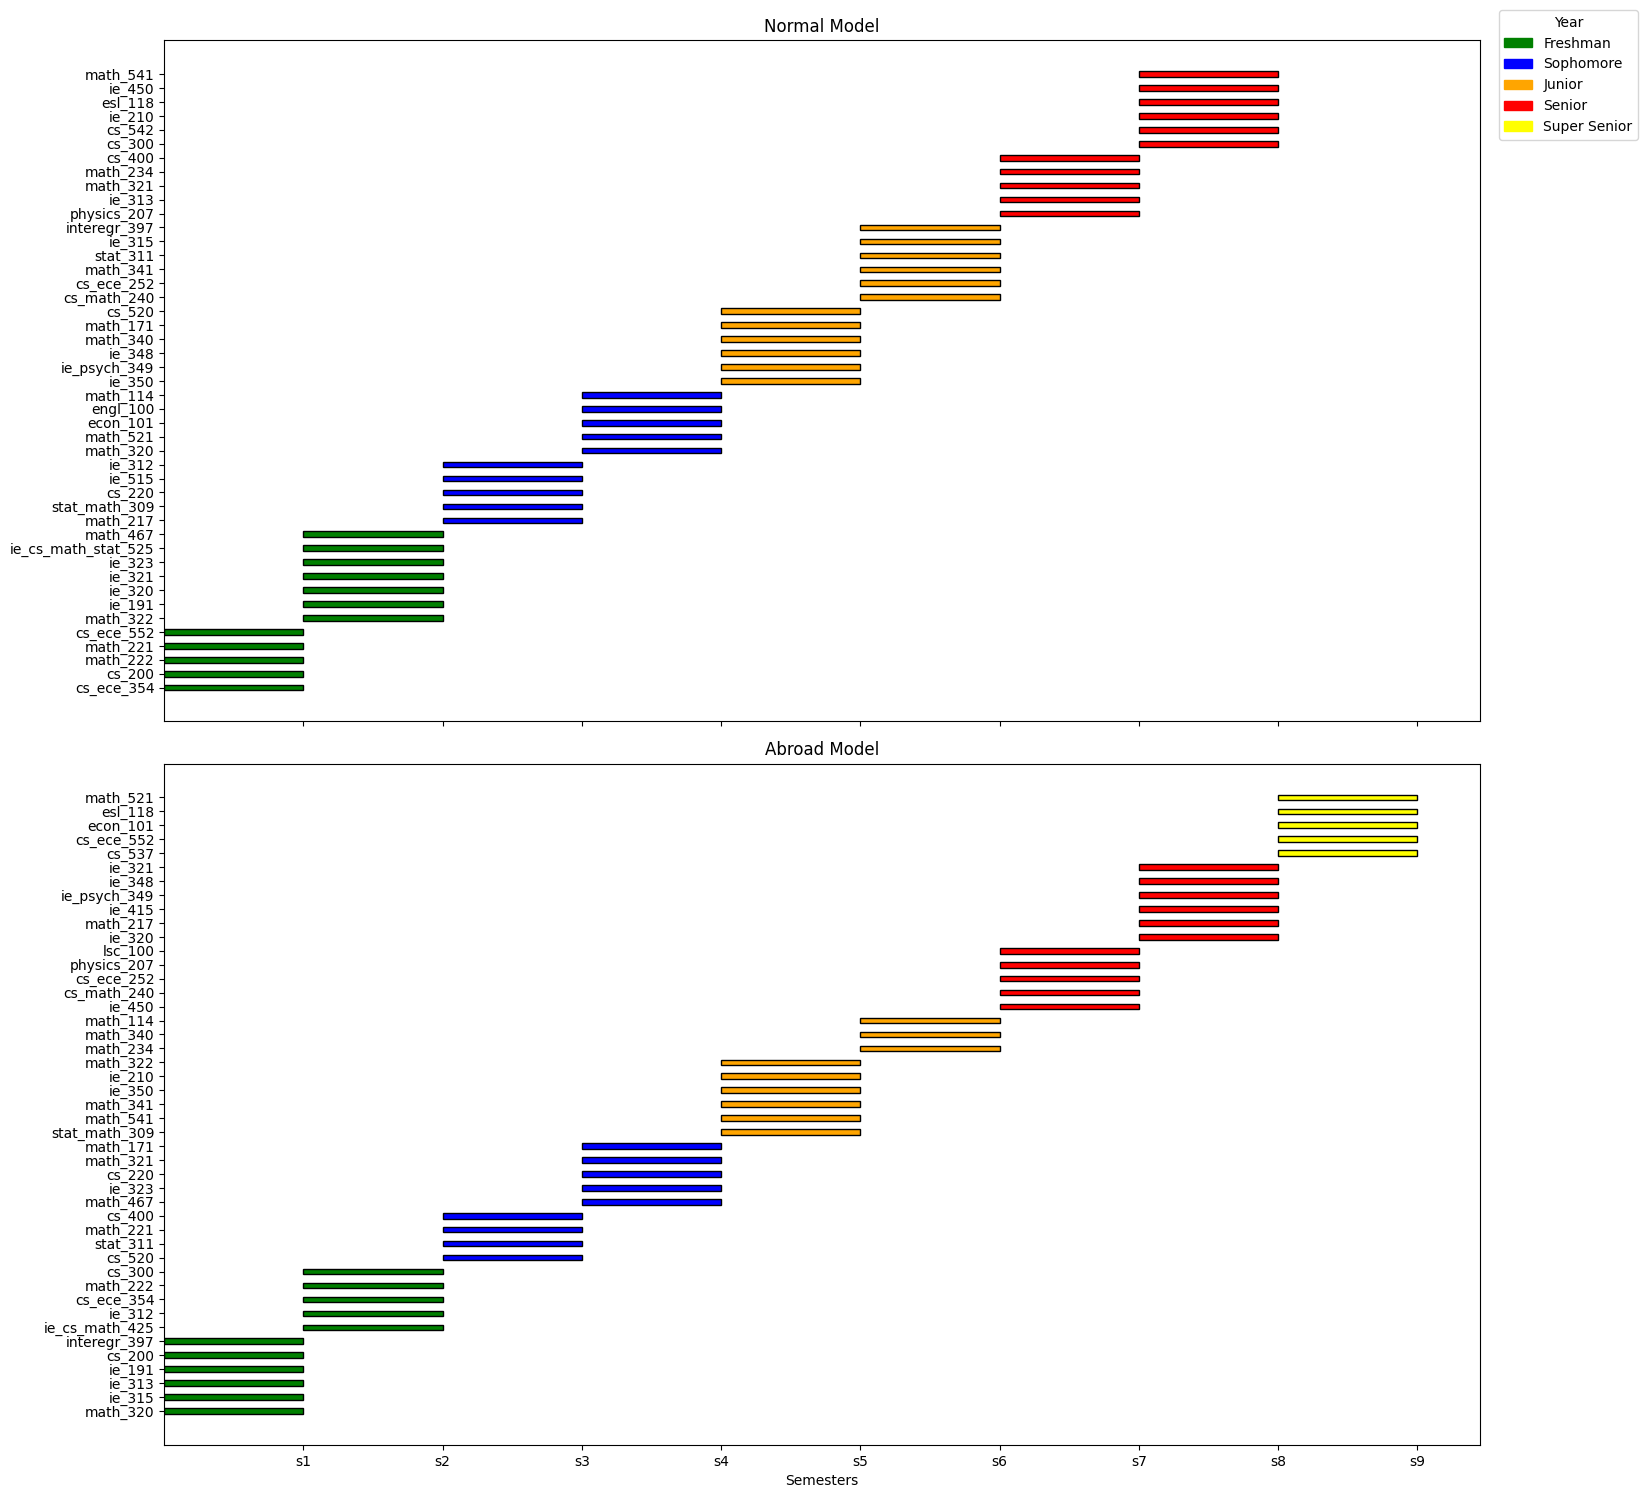

In [10]:
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import copy

results = df

mapping = {'s1': 'Freshman', 's2': 'Freshman', 's3': 'Sophomore', 's4': 'Sophomore', 's5': 'Junior', 's6': 'Junior', 's7': 'Senior','s8': 'Senior', 's9':'Super Senior'}

try:
    temp = list(df['s']) 
except:
    pass

results = results.replace({'s':mapping}).rename(columns={'s': 'Year', 'c':'Class'})
results['Semester'] = temp

df = results
df = df.sort_values(by='Semester')

semester_numeric_map = {semester: index for index, semester in enumerate(sorted(df['Semester'].unique()), 1)}

# Add the numeric semester mapping to the DataFrame.
df['Semester_Num'] = df['Semester'].map(semester_numeric_map)
colors = {'Freshman': 'green', 'Sophomore': 'blue', 'Junior': 'orange', 'Senior': 'red', 'Super Senior': 'yellow'}
df['Color'] = df['Year'].map(colors)

# # # Define the duration of one semester for visualization.
semester_duration = 1

df_normal = df[df['uni']=='normal'].copy()
df_abroad = df[df['uni']=='abroad'].copy()
df_normal.loc[:, 'Task_ID'] = range(len(df_normal))
df_abroad.loc[:, 'Task_ID'] = range(len(df_abroad))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 15), sharex=True)

# Plot for the normal model.
for index, row in df_normal.iterrows():
    ax1.barh(row["Task_ID"], semester_duration, left=row['Semester_Num'] - semester_duration, height=0.4, color=row['Color'], edgecolor='black')

ax1.set_yticks(df_normal["Task_ID"])
ax1.set_yticklabels(df_normal["Class"])
ax1.set_title("Normal Model")

# Plot for the abroad model.
for index, row in df_abroad.iterrows():
    ax2.barh(row["Task_ID"], semester_duration, left=row['Semester_Num'] - semester_duration, height=0.4, color=row['Color'], edgecolor='black')

ax2.set_yticks(df_abroad["Task_ID"])
ax2.set_yticklabels(df_abroad["Class"])
ax2.set_xlabel("Semesters")
ax2.set_title("Abroad Model")

# Set the x-axis ticks to correspond to semesters in reverse.
semesters = sorted(df_abroad['Semester'].unique())
xticks_positions = range(1, len(semester_numeric_map) + 1)
plt.xticks(xticks_positions, semesters)

# Show the legend for year colors.
legend_handles = [mpatches.Patch(color=color, label=year) for year, color in colors.items()]
fig.legend(handles=legend_handles, title="Year", loc='upper right', bbox_to_anchor=(1.1, 1))

# Improve layout to accommodate the labels and legend.
plt.tight_layout()

plt.show()

In [11]:
normal = df_normal[['Semester_Num', 'uni','classes_taken', 'credits_taken']].drop_duplicates().reset_index(drop=True).rename(columns={'uni':'model',  'classes_taken': 'Classes Taken', 'credits_taken': 'Credits Taken'})
normal

,Semester_Num,model,Classes Taken,Credits Taken
0,1,normal,5.0,18.0
1,2,normal,7.0,18.0
2,3,normal,5.0,18.0
3,4,normal,5.0,18.0
4,5,normal,6.0,18.0
5,6,normal,6.0,18.0
6,7,normal,5.0,18.0
7,8,normal,6.0,18.0


In [12]:
abroad = df_abroad[['Semester_Num', 'uni','classes_taken', 'credits_taken']].drop_duplicates().reset_index(drop=True).rename(columns={'uni':'model', 'classes_taken': 'Classes Taken', 'credits_taken': 'Credits Taken'})
abroad

,Semester_Num,model,Classes Taken,Credits Taken
0,1,abroad,6.0,17.0
1,2,abroad,5.0,16.0
2,3,abroad,4.0,14.0
3,4,abroad,5.0,18.0
4,5,abroad,6.0,18.0
5,6,abroad,3.0,12.0
6,7,abroad,5.0,17.0
7,8,abroad,6.0,16.0
8,9,abroad,5.0,17.0


In [13]:
%gams_cleanup --closedown

## Conclusion
From our optimization analysis, we have learned that the minimum number of classes to be taken, while meeting all major requirements and prerequisites for chosen courses, is 45 classes. While it is ambitious, it is common for students to triple major in Industrial Engineering, Math, Computer Science, and we have found the optimal path for these students to compelete this degree on time or with just one extra semester, and have the opportunity to study internationally.